In [67]:


import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, classification_report

In [41]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
# Checking the structure
df.info()

# Summary statistics
df.describe()

# Displaying the first few rows
df.head()

# Checking for missing values
df.isna().sum()

# Finding unique values for each column
unique_values = df.apply(lambda x: len(x.unique()))
print(unique_values)

# Dropping rows with missing values
df = df.dropna()

# Checking the structure after dropping NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64
<cl

In [43]:
def return_gender_binarized(gender):
    return 1 if gender == "Female" else 0

def return_smoking_history(smoking_history):
    dictionary = {"never": 0, "No Info": 1, "current": 2, "former": 3, "ever": 4, "not current": 5}
    return dictionary.get(smoking_history)

# Apply the functions to the DataFrame
df['gender'] = df['gender'].apply(return_gender_binarized)
df['smoking_history'] = df['smoking_history'].apply(return_smoking_history)

In [44]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


In [45]:
df['smoking_history'].value_counts()

smoking_history
1    35816
0    35095
3     9352
2     9286
5     6447
4     4004
Name: count, dtype: int64

In [46]:
df['gender'].value_counts()

gender
1    58552
0    41448
Name: count, dtype: int64

In [47]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [48]:
df.duplicated().sum()


3857

In [49]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

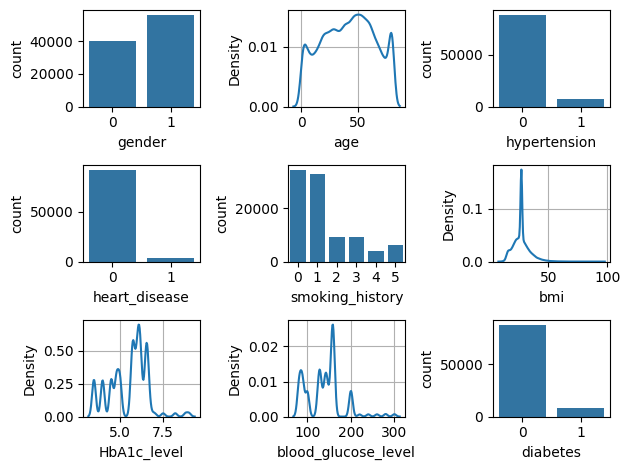

In [50]:
import seaborn as sns
r=3
c=3
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    if df[i].nunique()>6:
        sns.kdeplot(df[i])
        plt.grid()
    else:
        sns.countplot(x=df[i])
    it+=1
plt.tight_layout()
plt.show()

In [51]:
numeric_col=[]
non_numeric_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        if(df[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)
print(numeric_col)
print(non_numeric_col)

['age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'diabetes']


 Univariate analysis for gender column:


C:\Users\abarn\AppData\Local\Temp\ipykernel_16300\3086154800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


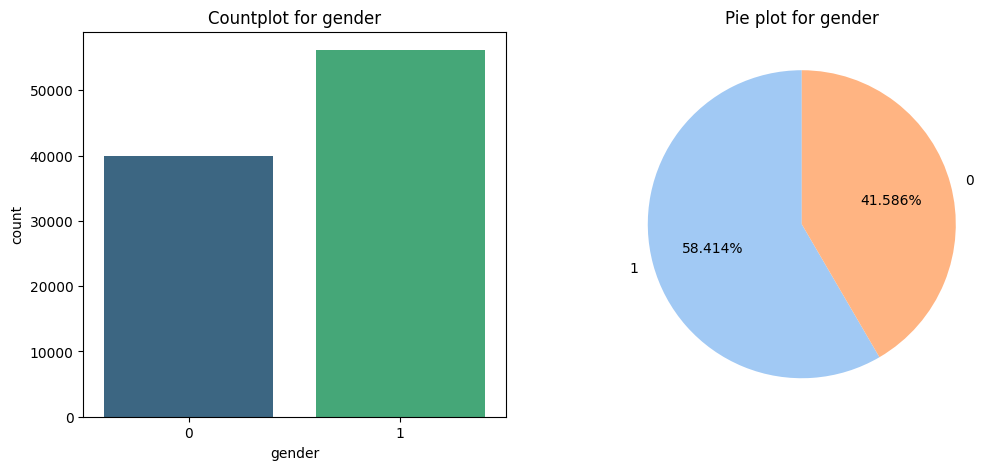

 Univariate analysis for hypertension column:


C:\Users\abarn\AppData\Local\Temp\ipykernel_16300\3086154800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


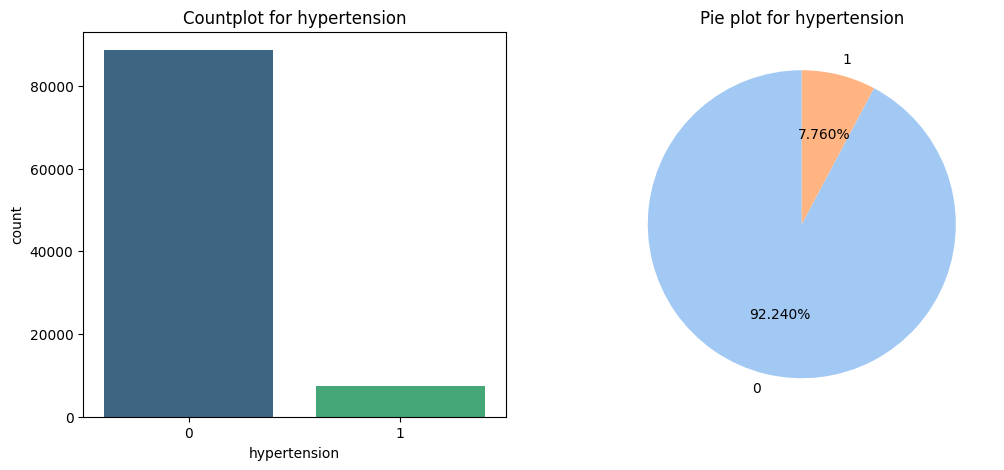

 Univariate analysis for heart_disease column:


C:\Users\abarn\AppData\Local\Temp\ipykernel_16300\3086154800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


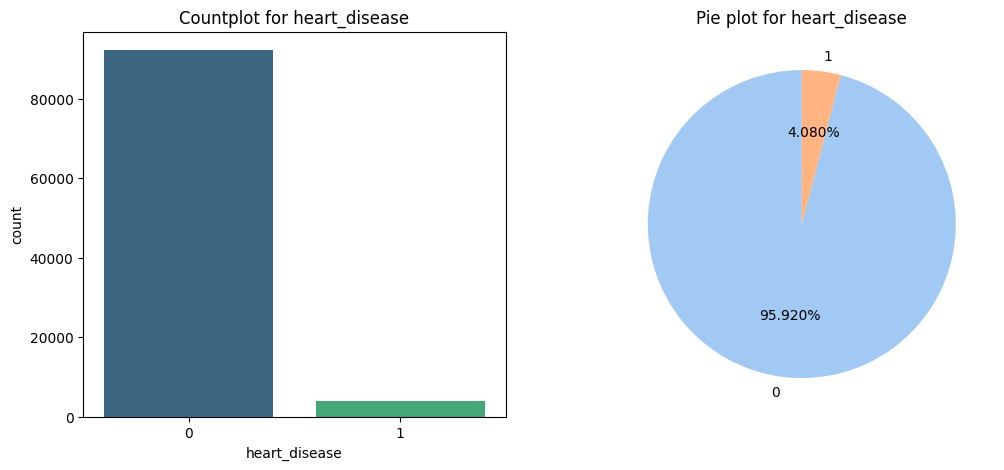

 Univariate analysis for diabetes column:


C:\Users\abarn\AppData\Local\Temp\ipykernel_16300\3086154800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


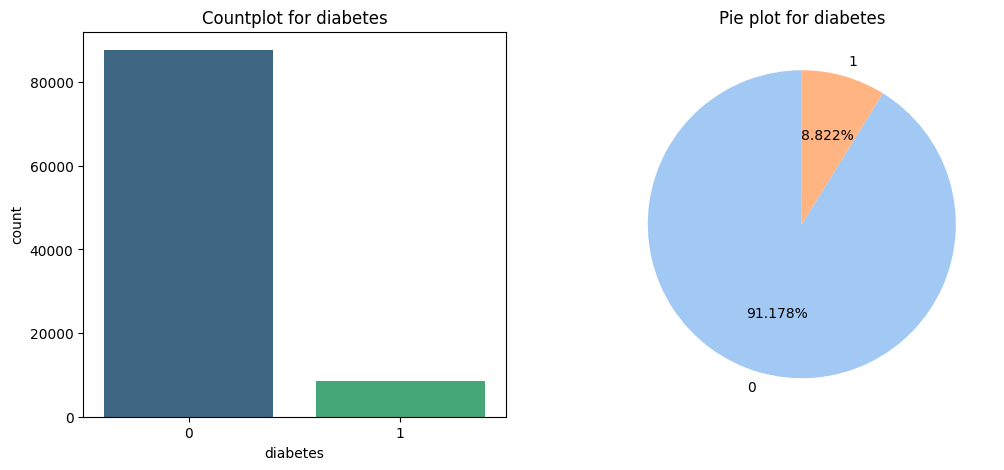

In [52]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

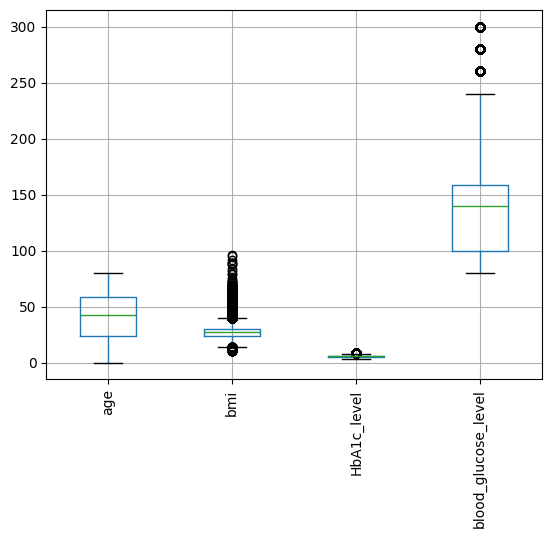

In [60]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].boxplot()
plt.xticks(rotation=90)
plt.show()

In [54]:
df_description = df.describe()

# Display the summary statistics
print(df_description)

             gender           age  hypertension  heart_disease  \
count  96143.000000  96143.000000  96143.000000   96143.000000   
mean       0.584140     41.795162      0.077603       0.040804   
std        0.492872     22.462777      0.267547       0.197836   
min        0.000000      0.080000      0.000000       0.000000   
25%        0.000000     24.000000      0.000000       0.000000   
50%        1.000000     43.000000      0.000000       0.000000   
75%        1.000000     59.000000      0.000000       0.000000   
max        1.000000     80.000000      1.000000       1.000000   

       smoking_history           bmi   HbA1c_level  blood_glucose_level  \
count     96143.000000  96143.000000  96143.000000         96143.000000   
mean          1.320970     27.321461      5.532649           138.217582   
std           1.473488      6.767821      1.073209            40.910245   
min           0.000000     10.010000      3.500000            80.000000   
25%           0.000000     23.

In [55]:
diagnosing = []
for value in df['HbA1c_level']:
    if value < 5.7:
        diagnosing.append('normal')
        
    elif (5.7 <= value) and (value <= 6.4):
        diagnosing.append('prediabetes')
        
    elif (value >= 6.5):
        diagnosing.append('diabetes')
        
df['initial_diagnosis'] = diagnosing



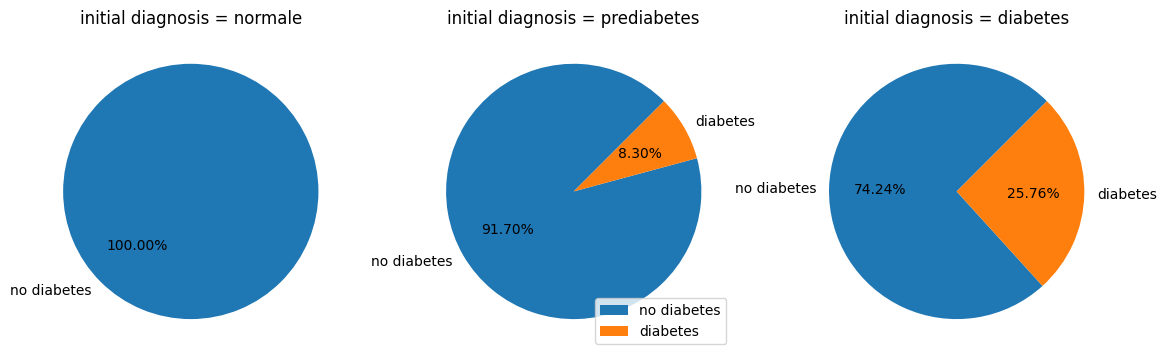

In [56]:
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['initial_diagnosis'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = normale');

plt.subplot(1,3,2);
plt.pie(df[df['initial_diagnosis'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['initial_diagnosis'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('initial diagnosis = diabetes');

In [57]:
sugar_test = []

for value in df['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')
        
    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')
        
    elif (value > 125):
        sugar_test.append('diabetes')
        
df['sugar_test'] = sugar_test

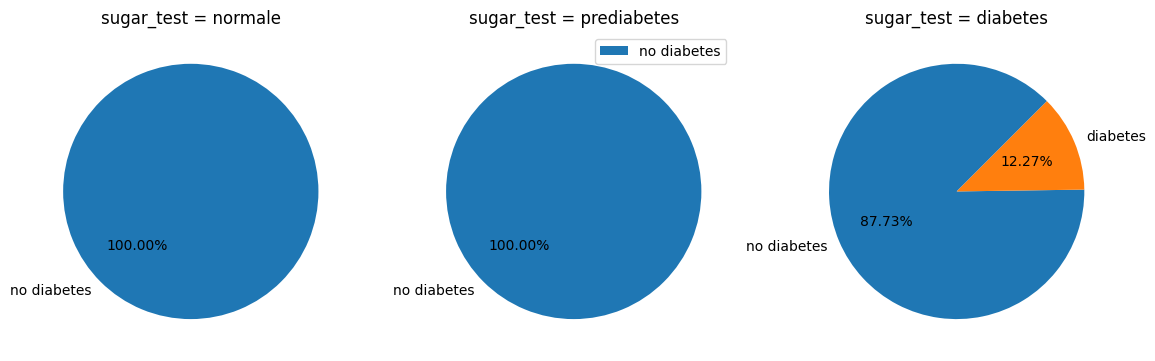

In [58]:
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['sugar_test'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = normale');

plt.subplot(1,3,2);
plt.pie(df[df['sugar_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['sugar_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('sugar_test = diabetes');

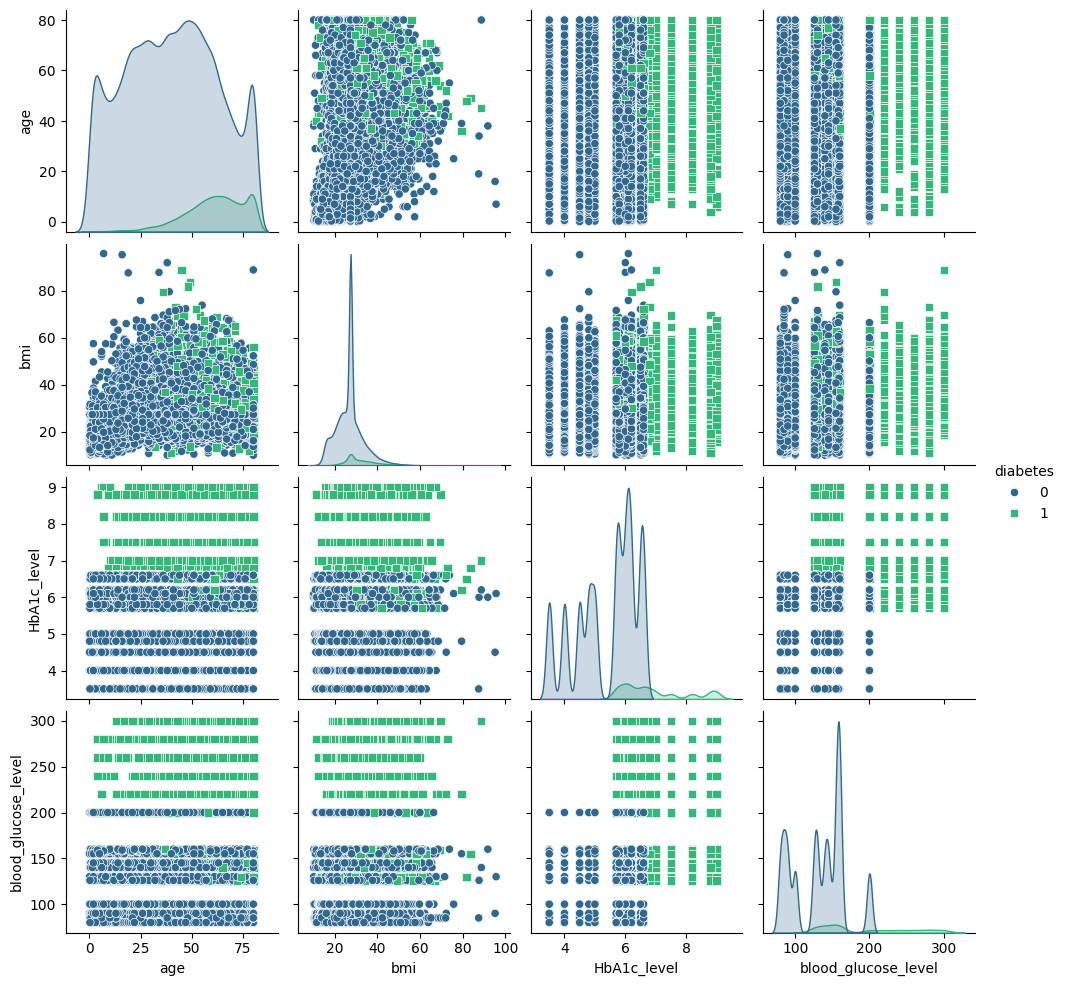

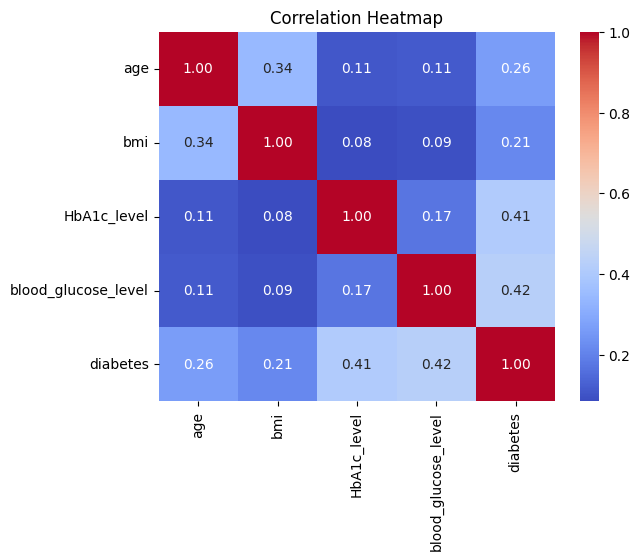

In [59]:
# Visualization: Pairplot for numeric columns
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', markers=['o', 's'], palette='viridis')
plt.show()

# Visualization: Correlation Heatmap for numeric columns
correlation_matrix = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [61]:
X = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

In [62]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)



LogisticRegression(random_state=42)

In [64]:
# Making predictions
y_pred = logreg_model.predict(X_test_scaled)



In [65]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.72%
Confusion Matrix:
[[17346   155]
 [  668  1060]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17501
           1       0.87      0.61      0.72      1728

    accuracy                           0.96     19229
   macro avg       0.92      0.80      0.85     19229
weighted avg       0.95      0.96      0.95     19229



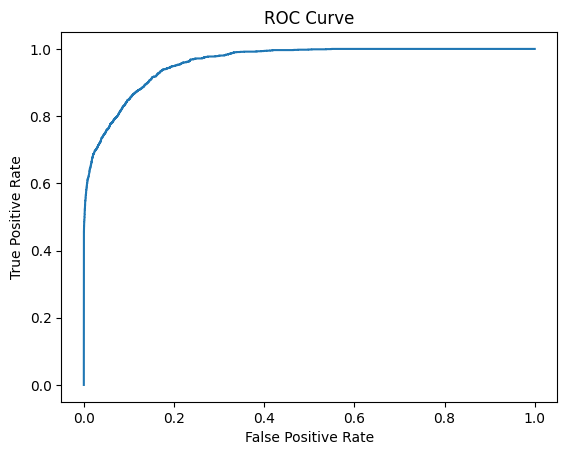

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17501
           1       0.71      0.70      0.71      1728

    accuracy                           0.95     19229
   macro avg       0.84      0.84      0.84     19229
weighted avg       0.95      0.95      0.95     19229



In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)[:, 1]


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Choose a threshold that balances precision and recall
adjusted_threshold = 0.3

# Apply the adjusted threshold to classify instances
y_pred_adjusted = (y_probabilities > adjusted_threshold).astype(int)

# Evaluate the performance with the new threshold
print(classification_report(y_test, y_pred_adjusted))
